In [65]:
import json
import random
from datetime import datetime, timedelta

# Veneto cities and villages with multiple venues each
locations = {
    "Venice": [
        "Teatro La Fenice", "Piazza San Marco", "Lido di Venezia", "Murano Glass Museum",
        "Palazzo Ducale", "Gallerie dell'Accademia", "Rialto Bridge", "Ca' Rezzonico",
        "Basilica di San Marco", "Peggy Guggenheim Collection", "Isola di Burano",
        "Scuola Grande di San Rocco", "San Giorgio Maggiore", "Campo Santa Margherita",
        "Jewish Ghetto", "Palazzo Contarini del Bovolo", "Fondazione Querini Stampalia",
        "Ca' d'Oro", "Venetian Arsenal", "Scala Contarini del Bovolo", "Church of San Zaccaria",
        "Palazzo Mocenigo", "Palazzo Grimani", "Campo Santa Maria Formosa", "Sant’Elena Park",
        "Palazzo Querini Stampalia", "Isola di Torcello", "Ghetto Nuovo Synagogue"
        # ... (add more as needed)
    ],
    "Vicenza": [
        "Piazza dei Signori", "Teatro Olimpico", "Villa La Rotonda", "Basilica Palladiana",
        "Museo Civico di Palazzo Chiericati", "Giardino Salvi", "Palazzo Thiene",
        "Villa Valmarana ai Nani", "Porta Castello", "Santa Corona Church", "Palazzo Chiericati Museum",
        "Palazzo Barbaran da Porto", "Villa Caldogno", "Palazzo Porto", "San Lorenzo Church",
        "Villa Trissino", "Villa Almerico Capra 'La Rotonda'", "Villa Bissari", "Rotonda di Vicenza",
        "Ponte San Michele", "Museo Naturalistico Archeologico", "Palazzo Bonin Longare"
        # ... (add more)
    ],
    "Padua": [
        "Stadio Euganeo", "Prato della Valle", "Palazzo della Ragione", "Orto Botanico",
        "Cappella degli Scrovegni", "Basilica di Sant'Antonio", "Scrovegni Chapel",
        "Museo del Precinema", "Palazzo Zabarella", "Church of the Eremitani", "Palazzo Moroni",
        "Botanical Garden of Padua (UNESCO site)", "Civic Museum", "Piazza dei Frutti",
        "Piazza delle Erbe", "Cattedrale di Padova", "Museo Diocesano", "Museo Antoniano",
        "Museo Bottacin", "Palazzo Liviano", "Museo della Padova Ebraica", "Abbazia di Santa Giustina"
        # ... (add more)
    ],
    "Verona": [
        "Arena di Verona", "Verona Exhibition Center", "Piazza Bra", "Juliet's House",
        "Castelvecchio", "Giardino Giusti", "Torre dei Lamberti", "Basilica of San Zeno",
        "Ponte Pietra", "Palazzo Barbieri", "Santa Anastasia Church", "Palazzo della Gran Guardia",
        "Roman Theatre", "Museum of Castelvecchio", "Ponte Scaligero", "Piazza delle Erbe",
        "Piazza dei Signori", "Giardino dell’Arnesa", "Arche Scaligere", "Chiesa di San Fermo Maggiore",
        "Chiesa di San Bernardino", "Palazzo Maffei", "Palazzo Canossa", "Museo Lapidario Maffeiano"
        # ... (add more)
    ],
    # Secondary cities and towns with 20-50 venues each (sample):
    "Treviso": [
        "Piazza dei Signori", "Teatro Mario Del Monaco", "Fontane di Treviso", "Villa Revedin",
        "Museo di Santa Caterina", "Isola della Pescheria", "Duomo di Treviso",
        "Museo Bailo", "Porta San Tommaso", "Palazzo dei Trecento", "Parco degli Alberi Parlanti",
        "Villa Pisani", "Church of San Francesco", "Palazzo Bomben", "Villa Giovannelli Colonna",
        "Fontana delle Tette", "Villa Margherita", "Museo Luigi Bailo", "Chiesa di San Nicolò",
        "Villa Corner",
        # Additional venues can be added here...
    ],
    "Bassano del Grappa": [
        "Ponte degli Alpini", "Museo Civico", "Piazza Garibaldi", "Castello degli Ezzelini",
        "Villa Angarano", "Museo della Grappa", "Chiesa di San Giovanni Battista",
        "Palazzo Agostinelli", "Villa Recoaro", "Pasticceria Biasetto", "Teatro Remondini",
        "Piazza Libertà", "Villa Moroni", "Villa Della Porta Bozzolo", "Chiesa del Cristo",
        "Villa Chisone", "Palazzo Bonaguro"
        # Add more local venues...
    ],
    "Asolo": [
        "Castello della Regina", "Villa Freya", "Piazza Garibaldi", "Rocca di Asolo",
        "Museo Civico", "Cathedral of Asolo", "Villa Barbaro", "Church of Santa Caterina",
        "Palazzo della Ragione", "Villa Maser", "Monte Grappa viewpoint", "Pieve di Pagnano",
        "Villa Scotti Pasini", "Parco Querini", "Villa Bremein"
        # More to add...
    ],
    # Adding smaller towns, villages, and notable places, approx 10–20 venues each:
    "Montagnana": [
        "Medieval Walls of Montagnana", "Piazza Vittorio Emanuele", "Castle of San Zeno",
        "Palazzo Valeri", "Duomo di Santa Maria Assunta", "Museo Civico Eusebio", "Villa Pisani Bolognesi Scalabrin"
    ],
    "Este": [
        "Castello di Este", "Roman Amphitheatre ruins", "Duomo di Santa Tecla", "Museo Nazionale Atestino",
        "Piazza Maggiore", "Villa Contarini", "Basilica di Sant'Andrea"
    ],
    "Cittadella": [
        "City Walls of Cittadella", "Piazza Pierobon", "Torre di Malta", "Palazzo Pretorio",
        "Church of San Donato", "Museo della Città"
    ],
    "Arquà Petrarca": [
        "Casa del Petrarca", "Chiesa di Santa Maria Assunta", "Piazza Petrarca",
        "Medieval village center", "Villa Pisani", "Parco della Rimembranza"
    ],
    "Borghetto sul Mincio": [
        "Ponte Visconteo", "Scaliger Castle", "Medieval village center", "Water Mills",
        "Chiesa di San Marco", "Piazza Bra"
    ],
    "Soave": [
        "Castle of Soave", "Medieval town walls", "Piazza del Comune", "Santa Maria Church",
        "Wine Museum", "Palazzo Scaligero"
    ],
    "Vittorio Veneto": [
        "Piazza del Popolo", "Villa Papadopoli", "Duomo di San Tiziano", "Museo della Battaglia",
        "Teatro Da Ponte", "Parco della Vittoria"
    ],
    "Bardolino": [
        "Lake Garda promenade", "Church of San Zeno", "Olive Oil Museum", "Piazza Matteotti",
        "Archaeological Museum", "Parco Baia delle Sirene"
    ],
    "San Donà di Piave": [
        "Cittadella Medicea", "Piazza Indipendenza", "Church of San Giovanni",
        "Municipal Library", "Villa Ancillotto"
    ],
    "Jesolo": [
        "Jesolo Beach", "Sea Life Aquarium", "Piazza Mazzini", "Pineta Beach",
        "Aqualandia Waterpark", "Parco Zoo Punta Verde"
    ],
    "Mestre": [
        "Parco San Giuliano", "Piazza Ferretto", "Church of San Lorenzo",
        "Parco Albanese", "Villa Querini", "Cataio Filippo"
    ],
    "Riva del Garda": [
        "Medieval Castle", "Lago di Garda", "Piazza III Novembre", "MAG Museo Alto Garda",
        "Torre Apponale", "La Rocca"
    ],
    "Valdagno": [
        "Villa Valle", "Parco delle Traine", "Roman Villa of Valdagno", "Church of San Clemente",
        "Villa Cerchiari"
    ],
    # Additional small villages and hamlets with key venues (sample)
    "Feltre": [
        "Castello di Feltre", "Piazza Maggiore", "Cattedrale di San Pietro Apostolo",
        "Palazzo della Magnifica Comunità", "Museo Civico"
    ],
    "Dolo": [
        "Villa Widmann", "Canale di Dolo", "Ponte di Dolo", "Chiesa di San Pio X",
        "Villa Jacur"
    ],
    "Monselice": [
        "Rocca di Monselice", "Villa Duodo", "Santuario delle Sette Chiese", "Piazza Mazzini",
        "Museo Rocca"
    ],
    "Portogruaro": [
        "Duomo di Portogruaro", "Palazzo degli Asburgo", "Museo Nazionale Concordiese",
        "Piazza della Repubblica", "Chiesa di Sant'Andrea"
    ],
    "San Vito di Cadore": [
        "Chiesa di San Vito", "Museo Ladino Cadorino", "Lago di Antorno",
        "Piani di Pezzè"
    ],
    "Campolongo Tapogliano": [
        "Villa Venier Contarini", "Chiesa di San Giovanni Battista", "Villa Manin",
        "Parco delle Risorgive"
    ],
    "Pedavena": [
        "Birrificio Pedavena", "Villa Pasolini dall’Onda", "Piazza Martiri",
        "Chiesa di San Antonio"
    ],
    # Continue similarly for other towns, villages, parks, and natural sites through Veneto ...
}


event_types = [
    "Music", "Sport", "Food & Drink", "Arts & Crafts", "Theatre", "Tour", "Workshop",
    "Festival", "Conference", "Exhibition"
]

base_url = "https://example.com/veneto-events/"

def random_date():
    today = datetime.now()
    end_date_limit = datetime(2025, 8, 30)
    # Calculate the difference in days between today and the end date limit
    days_difference = (end_date_limit - today).days

    # Ensure we don't generate dates in the past
    if days_difference < 0:
        return None, None # Or handle as appropriate, e.g., raise an error

    # Generate a random number of days between 0 and the days_difference
    random_days = random.randint(0, days_difference)
    start_date = today + timedelta(days=random_days)

    # Generate random time within the chosen day
    random_hours = random.randint(0, 23)
    random_minutes = random.randint(0, 59)
    start_date = start_date.replace(hour=random_hours, minute=random_minutes, second=0, microsecond=0)

    # Generate a random duration for the event
    duration_hours = random.randint(1, 10)
    end_date = start_date + timedelta(hours=duration_hours)

    # Ensure the end date is not beyond the limit
    if end_date > end_date_limit:
        end_date = end_date_limit # Cap the end date at the limit

    return start_date.isoformat(timespec='minutes'), end_date.isoformat(timespec='minutes')

def generate_random_description(event_type, city, venue):
    description_templates = [
        f"Prepare for an unforgettable {event_type.lower()} experience in the stunning city of {city}, held at the magnificent {venue}. This event promises to be a highlight of the season!",
        f"Dive into the world of {event_type.lower()} at this exciting gathering in {city}. Located at the renowned {venue}, it's an event you won't want to miss.",
        f"Explore the vibrant {event_type.lower()} scene in {city} with this special event at {venue}. Get ready for a day filled with discovery and enjoyment.",
        f"A unique {event_type.lower()} opportunity awaits you in {city}. Join us at the charming {venue} for an event designed to inspire and entertain.",
        f"Immerse yourself in the rich culture of {city} with this engaging {event_type.lower()} event at the iconic {venue}. It's the perfect way to spend your time.",
        f"Seeking adventure in {city}? Look no further than this captivating {event_type.lower()} event at {venue}. Fun and excitement are guaranteed!",
        f"Connect with fellow enthusiasts at this lively {event_type.lower()} event in {city}, taking place at the welcoming {venue}. Share your passion and make new friends.",
        f"Unwind and enjoy a delightful {event_type.lower()} experience in {city} at the picturesque {venue}. Relax and take in the atmosphere.",
        f"Expand your horizons with this insightful {event_type.lower()} event in {city}, hosted at the distinguished {venue}. Learn something new and be inspired.",
        f"Step into a world of wonder at this extraordinary {event_type.lower()} event in {city}, held at the historic {venue}. Prepare to be amazed!"
    ]
    return random.choice(description_templates).format(event_type=event_type.lower(), city=city, venue=venue)


events = []

for i in range(1, 100): # Changed range to 10001 to generate 10000 events
    city = random.choice(list(locations.keys()))
    venue = random.choice(locations[city])
    event_type = random.choice(event_types)
    start, end = random_date()

    # Only add event if a valid date range was generated
    if start and end:
        event = {
            "id": str(i),
            "title": f"{city} {event_type} Event #{i}",
            "type": event_type,
            "category": event_type, # Added category field
            "description": generate_random_description(event_type, city, venue),
            "city": city,
            "location": {
                "venue": venue,
                "address": f"{venue}, {city}, Veneto"
            },
            "start_date": start,
            "end_date": end,
            "url": f"{base_url}{i}"
        }
        events.append(event)

output = {
    "events": events
}

# Save to JSON file
with open("veneto_events_10000.json", "w", encoding="utf-8") as f:
    json.dump(output, f, indent=2, ensure_ascii=False)

print(f"Generated veneto_events_10000.json with {len(events)} events")

Generated veneto_events_10000.json with 99 events


In [4]:
!pip install geopy

In [66]:
import json
import time
import requests

def geocode_structured(venue, city, region="Veneto", country="Italy"):
    base_url = "https://nominatim.openstreetmap.org/search"
    headers = {'User-Agent': 'convert_to_geo/1.0'}

    params_list = [
        {'street': venue, 'city': city, 'state': region, 'country': country, 'format': 'json', 'limit': 1},
        {'city': city, 'state': region, 'country': country, 'format': 'json', 'limit': 1},
        {'street': venue, 'city': city, 'country': country, 'format': 'json', 'limit': 1},
        {'street': venue, 'state': region, 'country': country, 'format': 'json', 'limit': 1}
    ]

    for params in params_list:
        response = requests.get(base_url, params=params, headers=headers)
        if response.status_code != 200:
            continue
        data = response.json()
        if data:
            # Fix: Access lon from the first element of the list as well
            return float(data[0]['lat']), float(data[0]['lon'])
        time.sleep(1)  # Respect rate limit

    return None, None

def clean_address(event):
    venue = event.get('location', {}).get('venue', '').strip()
    city = event.get('city', '').strip()
    region = "Veneto"
    country = "Italy"

    parts = []

    def add_unique(part):
        if part and part.lower() not in [p.lower() for p in parts]:
            parts.append(part)

    add_unique(venue)
    add_unique(city)
    add_unique(region)
    add_unique(country)

    return ', '.join(parts)

# Load events
with open('veneto_events_10000.json', 'r', encoding='utf-8') as f:
    events_data = json.load(f)

# Geocode and add lat/lon to each event
for event in events_data['events']:
    venue = event.get('location', {}).get('venue', '').strip()
    city = event.get('city', '').strip()
    if venue and city:
        lat, lon = geocode_structured(venue, city)
    else:
        lat, lon = None, None
    event['location']['latitude'] = lat
    event['location']['longitude'] = lon
    print(f"Geocoded: {venue}, {city} -> {lat}, {lon}")

# Save results with geocodes
with open('veneto_events_geocoded_structured.json', 'w', encoding='utf-8') as f:
    json.dump(events_data, f, ensure_ascii=False, indent=2)

print("Geocoding complete and saved to veneto_events_geocoded_structured.json")

Geocoded: Parco delle Risorgive, Campolongo Tapogliano -> None, None
Geocoded: Wine Museum, Soave -> 45.4202303, 11.247722
Geocoded: Municipal Library, San Donà di Piave -> 45.6294811, 12.5641057
Geocoded: Cataio Filippo, Mestre -> 45.4943063, 12.2418053
Geocoded: Rotonda di Vicenza, Vicenza -> 45.5266698, 11.5504036
Geocoded: Medieval Walls of Montagnana, Montagnana -> 45.2333207, 11.4657779
Geocoded: Medieval village center, Borghetto sul Mincio -> None, None
Geocoded: Piazza Indipendenza, San Donà di Piave -> 45.6294057, 12.5642475
Geocoded: Museo Nazionale Atestino, Este -> 45.2296094, 11.6563462
Geocoded: Museo della Città, Cittadella -> 45.6487941, 11.7835801
Geocoded: Piazza Indipendenza, San Donà di Piave -> 45.6294057, 12.5642475
Geocoded: Piazza della Repubblica, Portogruaro -> 45.7755764, 12.8376743
Geocoded: Sea Life Aquarium, Jesolo -> 45.5367094, 12.6383337
Geocoded: Villa Widmann, Dolo -> 45.4234356, 12.0743252
Geocoded: Villa La Rotonda, Vicenza -> 45.5488306, 11.547882

# Geospatial research
## cerco nella linea padova vicenza con buffer 1 km gli eventi all'interno

In [ ]:
!pip install geopandas
!pip install matplotlib

In [52]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

# Sample events dataframe (flatten your JSON into pandas DataFrame)
data = {
    'id': [1, 2],
    'title': ["Padua Food & Drink Event #1", "San Donà di Piave Arts & Crafts Event #2"],
    'latitude': [45.4077172, 45.6294811],
    'longitude': [11.8734455, 12.5641057],
    # add other fields as needed
}

df = pd.DataFrame(data)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.set_crs(epsg=4326, inplace=True)  # WGS84 lat/lon

# Suppose you have a route as a LineString between Vicenza and Padua
route_coords = [(11.546699, 45.545932), (11.8734455, 45.4077172)]  # (lon, lat) tuples
route_line = LineString(route_coords)
route_gdf = gpd.GeoSeries([route_line], crs="EPSG:4326")

# Reproject to metric CRS for buffering (meters)
gdf_m = gdf.to_crs(epsg=3857)
route_m = route_gdf.to_crs(epsg=3857)

# Create 1 km buffer around route
buffer = route_m.buffer(1000).iloc[0]

# Filter events within buffer polygon
events_in_buffer = gdf_m[gdf_m.geometry.within(buffer)]

# Convert filtered events back to lat/lon CRS for display
events_in_buffer_wgs = events_in_buffer.to_crs(epsg=4326)

print(events_in_buffer_wgs[['id', 'title', 'geometry']])


   id                        title                   geometry
0   1  Padua Food & Drink Event #1  POINT (11.87345 45.40772)


#### Quando ho estratto la lista di eventi, posso chiedere alla AI di darmi una lista e "condirmi" l'output con LLM

/tmp/ipykernel_5541/1274075854.py:23: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


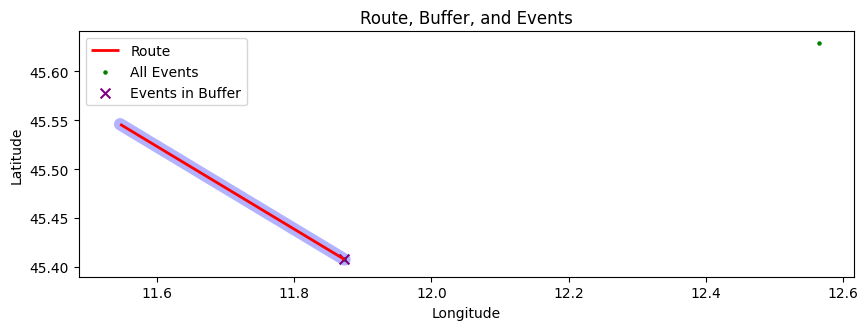

In [59]:
import matplotlib.pyplot as plt

# Plot the route and the buffer
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the route (converted back to WGS84 for plotting with events)
route_gdf.to_crs(epsg=4326).plot(ax=ax, color='red', linewidth=2, label='Route')

# Plot the buffer (converted back to WGS84 for plotting with events)
buffer_wgs = gpd.GeoSeries([buffer], crs=3857).to_crs(epsg=4326)
buffer_wgs.plot(ax=ax, color='blue', alpha=0.3, label='1km Buffer')

# Plot the events
gdf.to_crs(epsg=4326).plot(ax=ax, color='green', marker='o', markersize=5, label='All Events')

# Plot events within the buffer
events_in_buffer_wgs.plot(ax=ax, color='purple', marker='x', markersize=50, label='Events in Buffer')


ax.set_title("Route, Buffer, and Events")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.show()

### Carico su Qdrant gli eventi

In [ ]:
!pip install qdrant-client

In [2]:
import json
import os
from dotenv import load_dotenv
from qdrant_client import QdrantClient
from qdrant_client.http.models import PointStruct, VectorParams, Distance

# Load environment variables
load_dotenv(dotenv_path="../superlinked_app/.env")

QDRANT_URL = os.getenv("QDRANT_URL")
QDRANT_API_KEY = os.getenv("QDRANT_API_KEY")

client = QdrantClient(
    url=QDRANT_URL,
    api_key=QDRANT_API_KEY
)

# Load events data
with open("veneto_events_geocoded_structured.json", "r", encoding="utf-8") as f:
    events = json.load(f)["events"]

collection_name = "veneto_events"

# Check if collection exists
collections = [col.name for col in client.get_collections().collections]

if collection_name not in collections:
    client.create_collection(
        collection_name=collection_name,
        vectors_config=VectorParams(size=2, distance=Distance.COSINE)
    )
    # Explicitly create geo index for location field
    client.create_payload_index(
        collection_name=collection_name,
        field_name="location",
        field_schema="geo"
    )
else:
    # Safe to call repeatedly to ensure index exists
    client.create_payload_index(
        collection_name=collection_name,
        field_name="location",
        field_schema="geo"
    )

# Prepare points with vector and geo payload
points = []
for event in events:
    lat = event["location"].get("latitude")
    lon = event["location"].get("longitude")
    if lat is None or lon is None:
        continue
    payload = event.copy()
    payload["location"]["lat"] = lat
    payload["location"]["lon"] = lon
    payload["location"].pop("latitude", None)
    payload["location"].pop("longitude", None)

    points.append(
        PointStruct(
            id=int(event["id"]),
            vector=[lon, lat],
            payload=payload
        )
    )

# Upsert points
client.upsert(
    collection_name=collection_name,
    points=points
)

print(f"Uploaded {len(points)} events to Qdrant collection '{collection_name}'")


Uploaded 89 events to Qdrant collection 'veneto_events'


### Query verso qdrant di una route

In [56]:
import numpy as np
from shapely.geometry import LineString
from qdrant_client import QdrantClient
from qdrant_client.http import models as qmodels
import geopandas as gpd



# 1. Define your route (lon, lat)
#route_coords = [(11.546699, 45.545932), (11.8834455, 45.4077172)]
route_coords = [
    (11.546699, 45.545932),     # Vicenza
    (11.6603917, 45.2254915),   # Este
    (11.8734455, 45.4077172),   # Padua
    (12.84052, 45.78071)        # Portogruaro
]


route_line = LineString(route_coords)

# 2. Buffer the route by 1km (1000 meters)
# Convert to a projected CRS for accurate buffering
route_gdf = gpd.GeoSeries([route_line], crs="EPSG:4326").to_crs(epsg=3857)
buffer_poly = route_gdf.buffer(1000).to_crs(epsg=4326).iloc[0]  # back to WGS84

# 3. Get polygon coordinates for Qdrant (as [lon, lat] lists)
polygon_coords = np.array(buffer_poly.exterior.coords).tolist()

# 4. Convert polygon coords to [{"lon": lon, "lat": lat}, ...] format for Qdrant
polygon_coords_qdrant = [{"lon": lon, "lat": lat} for lon, lat in polygon_coords]
# 5. Connect to Qdrant

# 6. Build geo filter for Qdrant using GeoLineString wrapper for exterior
geo_filter = qmodels.Filter(
    must=[
        qmodels.FieldCondition(
            key="location",  # or "geo" if that is your geo field name
            geo_polygon=qmodels.GeoPolygon(
                exterior=qmodels.GeoLineString(points=polygon_coords_qdrant)
            )
        )
    ]
)

# 7. Query Qdrant (returns points inside the polygon)
results = client.query_points(
    collection_name="veneto_events",
    limit=100,
    query_filter=geo_filter,   # your qmodels.Filter instance
    with_payload=True          # include full payload in results
)
#print(results)
# 8. Print results
import pandas as pd

# Prepare a list of dictionaries from the query results
# data = []
# for point in results.points:
#     data.append({
#         "title": point.payload.get("title"),
#         "description": point.payload.get("description"),
#         "latitude": point.payload.get("location", {}).get("lat"),
#         "longitude": point.payload.get("location", {}).get("lon")
#     })

# # Create a DataFrame
# df = pd.DataFrame(data)

# # Show the results
# df



# Extract payloads from points
payloads = [point.payload for point in results.points]

# Create a DataFrame directly from the list of payload dictionaries
df = pd.json_normalize(payloads)  # This flattens nested dictionaries into columns

# Show the DataFrame
df



,id,title,type,category,description,city,start_date,end_date,url,location.venue,location.address,location.lat,location.lon
0,5,Vicenza Exhibition Event #5,Exhibition,Exhibition,Step into a world of wonder at this extraordin...,Vicenza,2025-08-19T00:44,2025-08-19T04:44,https://example.com/veneto-events/5,Rotonda di Vicenza,"Rotonda di Vicenza, Vicenza, Veneto",45.526670,11.550404
1,9,Este Exhibition Event #9,Exhibition,Exhibition,Expand your horizons with this insightful exhi...,Este,2025-08-22T08:05,2025-08-22T18:05,https://example.com/veneto-events/9,Museo Nazionale Atestino,"Museo Nazionale Atestino, Este, Veneto",45.229609,11.656346
2,12,Portogruaro Arts & Crafts Event #12,Arts & Crafts,Arts & Crafts,Immerse yourself in the rich culture of Portog...,Portogruaro,2025-08-19T12:50,2025-08-19T22:50,https://example.com/veneto-events/12,Piazza della Repubblica,"Piazza della Repubblica, Portogruaro, Veneto",45.775576,12.837674
3,15,Vicenza Conference Event #15,Conference,Conference,A unique conference opportunity awaits you in ...,Vicenza,2025-08-20T09:14,2025-08-20T15:14,https://example.com/veneto-events/15,Villa La Rotonda,"Villa La Rotonda, Vicenza, Veneto",45.548831,11.547883
4,20,Portogruaro Workshop Event #20,Workshop,Workshop,Expand your horizons with this insightful work...,Portogruaro,2025-08-21T05:21,2025-08-21T11:21,https://example.com/veneto-events/20,Chiesa di Sant'Andrea,"Chiesa di Sant'Andrea, Portogruaro, Veneto",45.775598,12.837457
5,26,Vicenza Festival Event #26,Festival,Festival,Immerse yourself in the rich culture of Vicenz...,Vicenza,2025-08-22T11:31,2025-08-22T21:31,https://example.com/veneto-events/26,Porta Castello,"Porta Castello, Vicenza, Veneto",45.548831,11.547883
6,28,Portogruaro Theatre Event #28,Theatre,Theatre,Seeking adventure in Portogruaro? Look no furt...,Portogruaro,2025-08-23T13:41,2025-08-23T18:41,https://example.com/veneto-events/28,Museo Nazionale Concordiese,"Museo Nazionale Concordiese, Portogruaro, Veneto",45.775345,12.835497
7,34,Padua Arts & Crafts Event #34,Arts & Crafts,Arts & Crafts,Expand your horizons with this insightful arts...,Padua,2025-08-20T04:40,2025-08-20T06:40,https://example.com/veneto-events/34,Abbazia di Santa Giustina,"Abbazia di Santa Giustina, Padua, Veneto",45.407717,11.873446
8,55,Vicenza Theatre Event #55,Theatre,Theatre,Explore the vibrant theatre scene in Vicenza w...,Vicenza,2025-08-21T08:25,2025-08-21T17:25,https://example.com/veneto-events/55,Ponte San Michele,"Ponte San Michele, Vicenza, Veneto",45.546095,11.548265
9,65,Portogruaro Music Event #65,Music,Music,Immerse yourself in the rich culture of Portog...,Portogruaro,2025-08-27T19:44,2025-08-27T23:44,https://example.com/veneto-events/65,Chiesa di Sant'Andrea,"Chiesa di Sant'Andrea, Portogruaro, Veneto",45.775598,12.837457


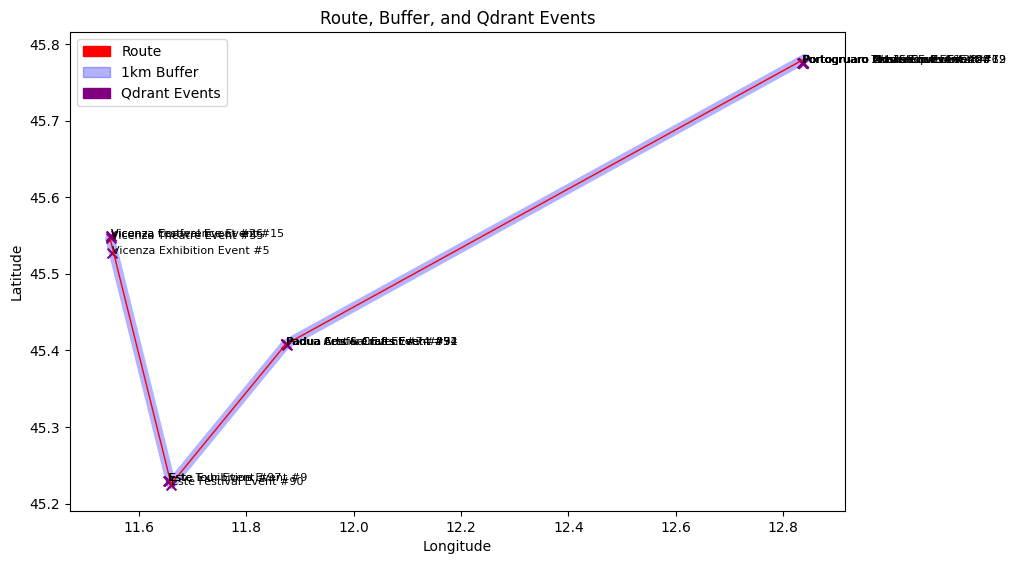

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.patches as mpatches

# Collect Qdrant results into a GeoDataFrame
event_points = []
titles = []
for point in results.points:
    loc = point.payload.get("location", {})
    lat = loc.get("lat")
    lon = loc.get("lon")
    if lat is not None and lon is not None:
        event_points.append(Point(lon, lat))
        titles.append(point.payload.get("title", ""))

if event_points:
    gdf_qdrant = gpd.GeoDataFrame({"title": titles, "geometry": event_points}, crs="EPSG:4326")
else:
    gdf_qdrant = gpd.GeoDataFrame(columns=["title", "geometry"], crs="EPSG:4326")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the route (no label here)
gpd.GeoSeries([route_line], crs="EPSG:4326").plot(ax=ax, color='red', linewidth=1)

# Plot the buffer (no label here)
gpd.GeoSeries([buffer_poly], crs="EPSG:4326").plot(ax=ax, color='blue', alpha=0.3)

# Plot Qdrant events
if not gdf_qdrant.empty:
    gdf_qdrant.plot(ax=ax, color='purple', marker='x', markersize=50)
    # Optionally, add event titles
    for idx, row in gdf_qdrant.iterrows():
        ax.text(row.geometry.x, row.geometry.y, row.title, fontsize=8, color='black')
else:
    print("No events found in Qdrant for this buffer.")

# Manually create legend patches
route_patch = mpatches.Patch(color='red', label='Route')
buffer_patch = mpatches.Patch(color='blue', alpha=0.3, label='1km Buffer')
events_patch = mpatches.Patch(color='purple', label='Qdrant Events')
ax.legend(handles=[route_patch, buffer_patch, events_patch])

ax.set_title("Route, Buffer, and Qdrant Events")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()